### importeren van benodigheden

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Datasets inlezen

In [2]:
compleet_data = pd.read_csv("CompleetDataset.csv")

C:\Users\menno\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
compleet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

### Data cleaning

ik ga alle prestaties statistieken gebruiken, dit omdat deze belangrijk zijn voor de postitie van de speler. Elke positie heeft namelijk andere kwaliteiten nodig. En uiteindelijk de preffered position.

dataset met alle statistieken

In [4]:
df_sub1= compleet_data.iloc[:,13:47]

dataset met de positie

In [5]:
df_sub2=compleet_data.iloc[:,63:64]

samenvoegen van de datasets zodat er testen gedaan kunnen worden

In [6]:
df_sub=pd.concat([df_sub1, df_sub2], axis=1)

zorgen dat er 1 positie overblijft voor de voorspelling

In [7]:
df_sub["positie"] = df_sub['Preferred Positions'].astype(str).str[0:3]
df_sub=df_sub.drop(['Preferred Positions'], axis=1)
df_sub.head(160)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,positie
0,89,63,89,63,93,95,85,81,91,94,...,83,94,23,91,92,31,80,85,88,ST
1,92,48,90,95,95,96,77,89,97,95,...,88,85,26,87,73,28,59,90,85,RW
2,94,56,96,82,95,92,75,81,96,89,...,81,80,33,90,78,24,53,80,83,LW
3,88,78,86,60,91,83,77,86,86,94,...,83,87,38,77,89,45,80,84,88,ST
4,58,29,52,35,48,70,15,14,30,13,...,55,25,11,61,44,10,83,70,11,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,62,83,56,53,78,84,68,68,72,64,...,83,78,75,66,89,83,89,75,74,CM
156,69,65,79,58,87,79,77,83,88,73,...,87,78,51,72,67,59,64,86,78,RW
157,55,58-10,69,72,83,74,84,87,78+3,75,...,90,80,51,50,76,61,72,85,72,CDM
158,76,30,92,88,85,81,60,74,87,76,...,84,56,27,65,80,24,39,82,75,CF


groeperen zodat er gekeken kan worden naar hoeveel spelers er welke positie hebben

In [8]:
df_sub["positie"].value_counts()

CB     2705
ST     2277
GK     2029
CM     1977
CDM    1396
RM     1350
LM     1326
LB     1309
RB     1195
CAM    1125
RW      429
LW      427
CF      205
LWB     120
RWB     111
Name: positie, dtype: int64

grafiek maken met posities en aantallen

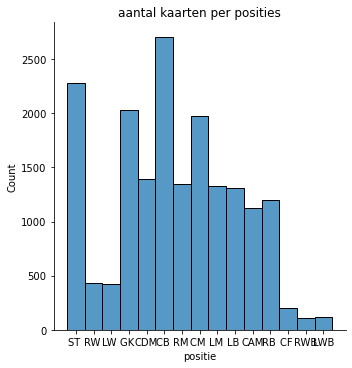

In [9]:
sns.displot(df_sub["positie"])
plt.title("aantal kaarten per posities")
plt.xlabel("positie")
plt.show()

In [10]:
cols = [col for col in df_sub.columns if col not in ['positie']]
for i in cols:
    df_sub[i] = df_sub[i].apply(lambda x: eval(x) if isinstance(x,str) else x)
df_sub.iloc[::500, :]
df_sub.head(160)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,positie
0,89,63,89,63,93,95,85,81,91,94,...,83,94,23,91,92,31,80,85,88,ST
1,92,48,90,95,95,96,77,89,97,95,...,88,85,26,87,73,28,59,90,85,RW
2,94,56,96,82,95,92,75,81,96,89,...,81,80,33,90,78,24,53,80,83,LW
3,88,78,86,60,91,83,77,86,86,94,...,83,87,38,77,89,45,80,84,88,ST
4,58,29,52,35,48,70,15,14,30,13,...,55,25,11,61,44,10,83,70,11,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,62,83,56,53,78,84,68,68,72,64,...,83,78,75,66,89,83,89,75,74,CM
156,69,65,79,58,87,79,77,83,88,73,...,87,78,51,72,67,59,64,86,78,RW
157,55,48,69,72,83,74,84,87,81,75,...,90,80,51,50,76,61,72,85,72,CDM
158,76,30,92,88,85,81,60,74,87,76,...,84,56,27,65,80,24,39,82,75,CF


### Model bouwen

Ik ga gebruik maken van de random forest methode, deze methode pakt steeds 2 variabele (kolommen) en gaat kijken hoe ze tot elkaar in verhouding staan dmv bomen. Hoe meer bomen er gemaakt worden hoe beter het algoritme werkt. Hieronder wordt het model gebouwd en gesplitst in training en testset.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

x = df_sub.loc[:, ~df_sub.columns.isin(['positie'])]
y = df_sub['positie']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=84)

In [12]:
rf = RandomForestClassifier(random_state=84, n_estimators=5000)
rf = rf.fit(x_train, y_train)

Testen van de accuraatheid

In [13]:
rf.score(x_test,y_test)

0.5582429802613289

### Evalueren model

Kijken welke posities en hoe ze worden weergegeven

In [14]:
rf.classes_

array(['CAM', 'CB ', 'CDM', 'CF ', 'CM ', 'GK ', 'LB ', 'LM ', 'LW ',
       'LWB', 'RB ', 'RM ', 'RW ', 'RWB', 'ST '], dtype=object)

matrix maken

In [15]:
y_test_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 44,   0,  11,   0,  75,   0,   0,  33,   0,   0,   1,  33,   0,
          0,  32],
       [  0, 473,  11,   0,  20,   0,  21,   0,   0,   0,  11,   0,   0,
          0,   0],
       [  2,  52,  67,   0, 145,   0,  10,   1,   0,   0,   3,   4,   0,
          0,   0],
       [  4,   0,   0,   7,   5,   0,   0,   3,   0,   0,   0,   3,   0,
          0,  16],
       [ 23,  25,  51,   0, 271,   0,   8,   6,   0,   0,   2,  11,   0,
          0,   5],
       [  0,   0,   0,   0,   0, 430,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,  33,   3,   0,  15,   0, 160,   2,   0,   0,  53,   4,   0,
          0,   0],
       [ 17,   2,   1,   0,  34,   0,  32,  46,   0,   0,  10,  60,   0,
          0,  52],
       [  4,   0,   0,   0,   6,   0,   1,  17,   4,   0,   0,  28,   2,
          0,  26],
       [  0,   1,   1,   0,   1,   0,  13,   0,   0,   0,   8,   2,   0,
          0,   0],
       [  0,  63,   5,   0,  27,   0,  97,   4,   0,   0,  53,   6,   1,
       

netter maken van de matrix

In [17]:
conf_matrix = pd.DataFrame(cm, index=['CAM_echt', 'CB_echt', 'CDM_echt', 'CF_echt', 'CM_echt', 'GK_echt', 'LB_echt', 'LM_echt', 'LW_echt',
       'LWB_echt', 'RB_echt', 'RM_echt', 'RW_echt', 'RWB_echt', 'ST_echt'], columns = ['CAM', 'CB ', 'CDM', 'CF ', 'CM ', 'GK ', 'LB ', 'LM ', 'LW ',
       'LWB', 'RB ', 'RM ', 'RW ', 'RWB', 'ST ']) 
conf_matrix

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
CAM_echt,44,0,11,0,75,0,0,33,0,0,1,33,0,0,32
CB_echt,0,473,11,0,20,0,21,0,0,0,11,0,0,0,0
CDM_echt,2,52,67,0,145,0,10,1,0,0,3,4,0,0,0
CF_echt,4,0,0,7,5,0,0,3,0,0,0,3,0,0,16
CM_echt,23,25,51,0,271,0,8,6,0,0,2,11,0,0,5
GK_echt,0,0,0,0,0,430,0,0,0,0,0,0,0,0,0
LB_echt,0,33,3,0,15,0,160,2,0,0,53,4,0,0,0
LM_echt,17,2,1,0,34,0,32,46,0,0,10,60,0,0,52
LW_echt,4,0,0,0,6,0,1,17,4,0,0,28,2,0,26
LWB_echt,0,1,1,0,1,0,13,0,0,0,8,2,0,0,0


ik weet niet hoe ik verder precision and recall moet berekenen.